### Завдання 2
Використовуючи дані із файлу petrol_consumption.csv побудуйте модель множинної регресії для знаходження залежності між
значеннями споживання бензину і похідними факторами. Оцініть якість отриманої регресії.

In [97]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6 

**Імпортуємо файл, створюємо датафрейм:**

In [98]:
petrol_cons = pd.read_csv('petrol_consumption.csv')
petrol_cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


**Будуємо діаграму попарних залежностей параметрів датафрейму:**

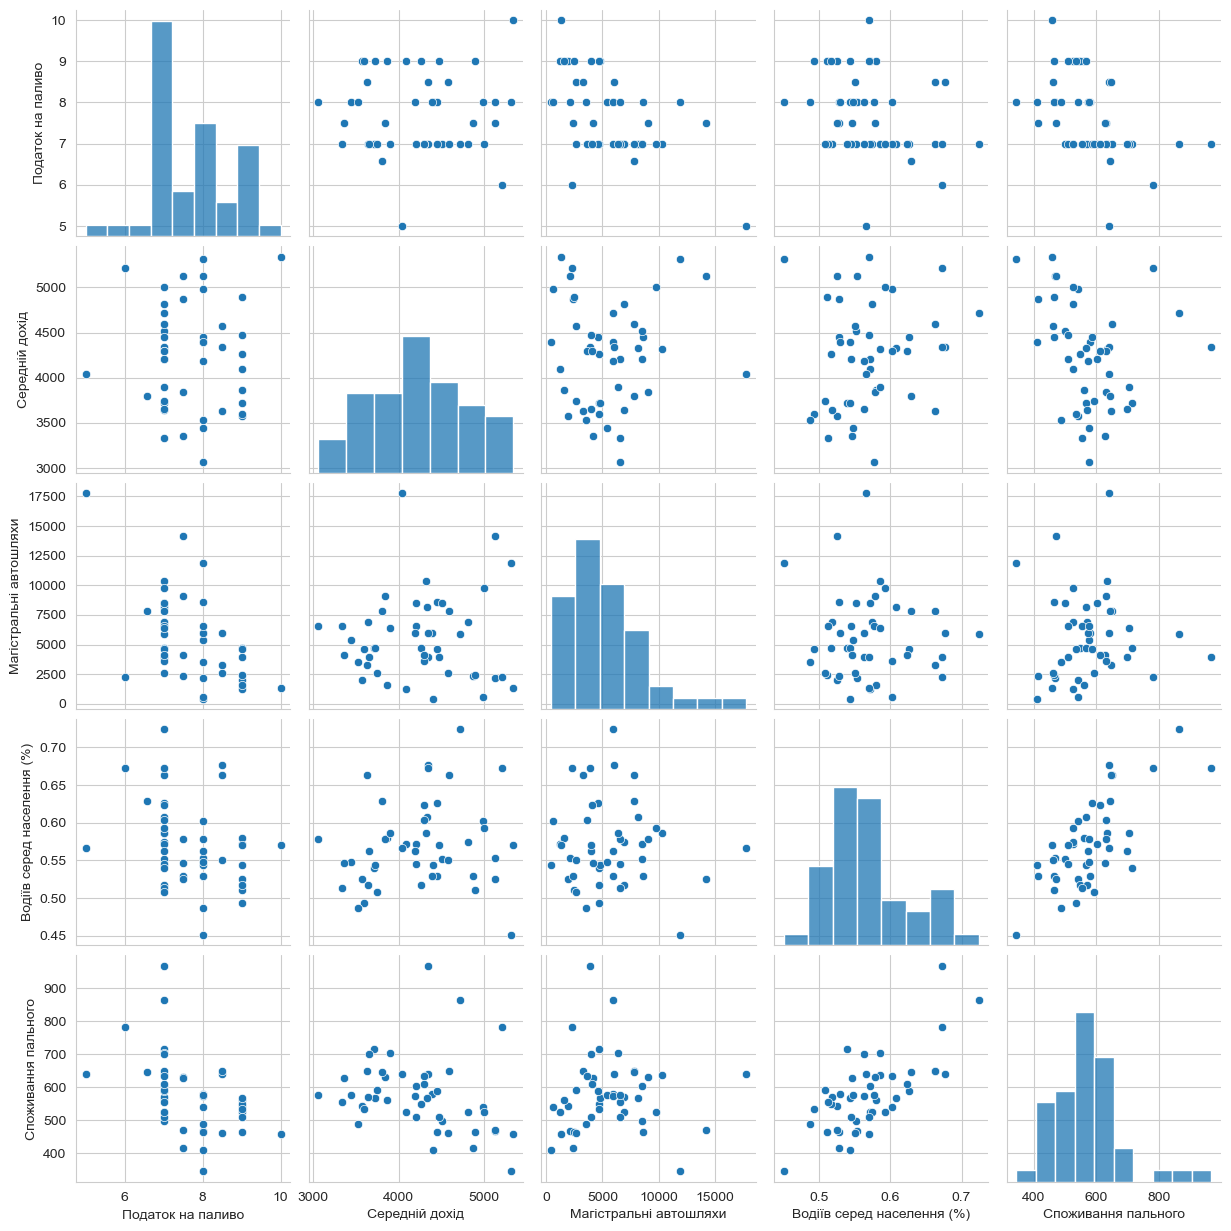

In [99]:
petrol_cons.columns = ['Податок на паливо', 
                      'Середній дохід',
                      'Магістральні автошляхи',
                      'Водіїв серед населення (%)',
                      'Споживання пального']

sb.pairplot(petrol_cons)

**Оскільки візуально важко визначити найменш скорельовані параметри, будуєм матрицю кореляції та теплову карту:**

In [100]:
correlations = petrol_cons.corr()
correlations

,Податок на паливо,Середній дохід,Магістральні автошляхи,Водіїв серед населення (%),Споживання пального
Податок на паливо,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Середній дохід,0.012665,1.000000,0.050163,0.157070,-0.244862
Магістральні автошляхи,-0.522130,0.050163,1.000000,-0.064129,0.019042
Водіїв серед населення (%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Споживання пального,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Теплова карта даних про споживання пального.')]

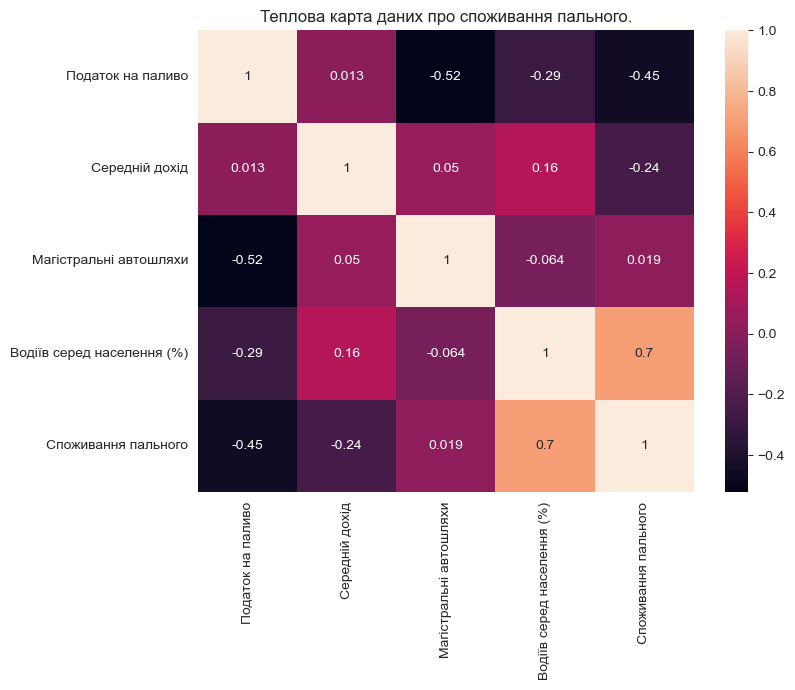

In [101]:
sb.heatmap(correlations, annot=True).set(title='Теплова карта даних про споживання пального.')

**На підставі отриманої теплової діаграми можна зробити висновок про достатньо слабку кореляцію між провідними параметрами, тому спробуємо побудувати модель з використанням всіх цих параметрів.**

In [110]:
ps_data = petrol_cons.drop(['Споживання пального'], axis=1)
ps_target = petrol_cons[['Споживання пального']].values

X, y = scale(ps_data), ps_target

model = LinearRegression().fit(X, y)
print(f'R^2 = {model.score(X, y):.2f}')

R^2 = 0.68


**Отриманий коефіціент $R^2 = 0.68$ декілька перевищує 0.5, але все одно не достатньо високий, тому ми не можемо стверджувати, що модель добре описує реальну залежність.  
Прогнози з використанням такої моделі можуть дати значну похибку.**

In [104]:
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

intercept:  [576.77083333]
slope:  [[-32.7310515  -37.79691223  -8.3813148   73.3569154 ]]


**Точка перетину осі y при x = 0 дорівнює 576.77  
Нахил ліній регресії для провідних параметрів дорівнює: -32.7310515, -37.79691223, -8.3813148, 73.3569154 відповідно.  
Ці коефіціенти відображають на скільки одиниць зміниться значення предиктора (Споживання пального) при зміні відповідного параметру на 1.**

**Спробуємо спрогнозувати значення предиктора за допомогою побудованої моделі і візуалізувати результати:**

In [105]:
y_pred = model.predict(X)
print('prediction: ', y_pred[:5], sep='\n')

prediction: 
[[523.23372749]
 [553.11530293]
 [578.10744578]
 [493.35625176]
 [532.02892629]]


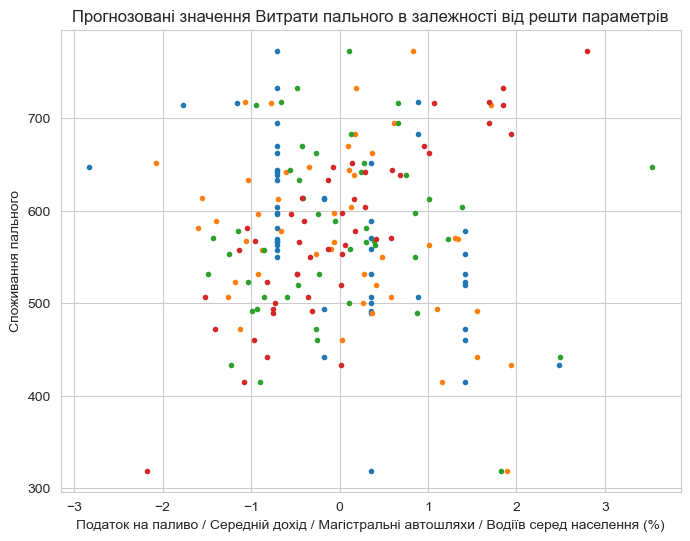

In [106]:
plt.plot(X, y_pred, '.')
plt.title('Прогнозовані значення Витрати пального в залежності від решти параметрів')
plt.xlabel('Податок на паливо / Середній дохід / Магістральні автошляхи / Водіїв серед населення (%)')
plt.ylabel('Споживання пального')
plt.show()

**Показники якості побудованої моделі на підставі актуальних і спрогнозованих даних:**

In [107]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squred error: {mse:.2f}')
print(f'Root mean squred error: {rmse:.2f}')

Mean absolute error: 48.78
Mean squred error: 3938.54
Root mean squred error: 62.76


**Сердня помилка побудованої моделі mae = 48.78 і корінь із средньої квадратичної похибки rmse = 62.76 значно відрізняються між собою і достатньо вагомі відносно предиктора,  що додатково свідчить про невисоку якість побудованої моделі лінійної регресії.**